**Importing the Dependencies**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,f1_score,recall_score,precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [9]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [10]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2538,7758-UJWYS,Male,0,Yes,Yes,34,No,No phone service,DSL,No,...,No,Yes,Yes,No,Two year,Yes,Electronic check,40.55,1325.85,No
3334,0337-CNPZE,Female,0,No,No,41,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.30,4443.45,Yes
6207,6769-DYBQN,Male,1,No,No,46,Yes,No,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,No,Electronic check,85.00,3969.4,Yes
2950,3345-JHUEO,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.20,55.7,No
4456,1619-YWUBB,Female,0,Yes,No,68,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.95,1614.9,No


In [11]:
#displaying all the columns
pd.set_option('display.max_columns',None)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# there is imbalanced classification in target column
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# CustomerID has no role in predicting whether the customer will churn or not ,so we will drop this column
df.drop(columns=['customerID'],inplace =True)

In [16]:
df.shape

(7043, 20)

In [17]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [18]:
df.duplicated().sum()

22

In [19]:
 # dropping the duplicate rows as they are not adding any further useful info in our data
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(7021, 20)

In [21]:
#converting the total charges column from object to float64
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [22]:
 # we just have 0.15% null values in total charges so dropping these rows would not have too much effect our data
100*df['TotalCharges'].isnull().sum()/len(df['TotalCharges'])

0.1566728386269762

In [23]:
# droping the rows who are having null values at any column
df.dropna(how='any',inplace=True)

In [24]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
# printing the unique values in all the categorical column

categorical_column=df.select_dtypes(include='object').columns.to_list()
categorical_column=categorical_column+[ "SeniorCitizen" ] # concatinating the seniorCitizen as it is categorical column


for object_col in categorical_column:
    print(object_col, ": ",df[object_col].unique())
    print('-'*70)

gender :  ['Female' 'Male']
----------------------------------------------------------------------
Partner :  ['Yes' 'No']
----------------------------------------------------------------------
Dependents :  ['No' 'Yes']
----------------------------------------------------------------------
PhoneService :  ['No' 'Yes']
----------------------------------------------------------------------
MultipleLines :  ['No phone service' 'No' 'Yes']
----------------------------------------------------------------------
InternetService :  ['DSL' 'Fiber optic' 'No']
----------------------------------------------------------------------
OnlineSecurity :  ['No' 'Yes' 'No internet service']
----------------------------------------------------------------------
OnlineBackup :  ['Yes' 'No' 'No internet service']
----------------------------------------------------------------------
DeviceProtection :  ['No' 'Yes' 'No internet service']
----------------------------------------------------------------------

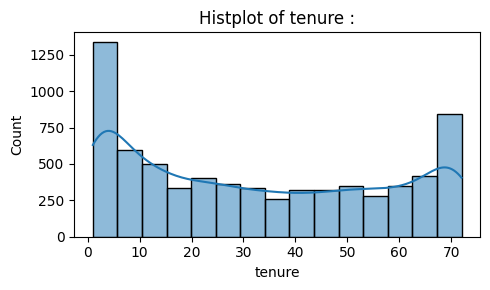

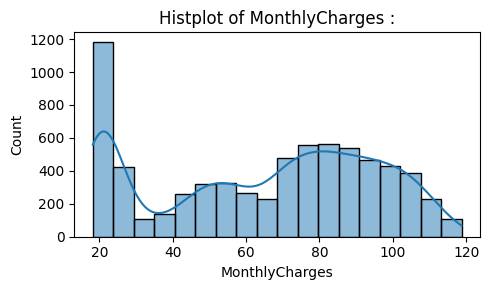

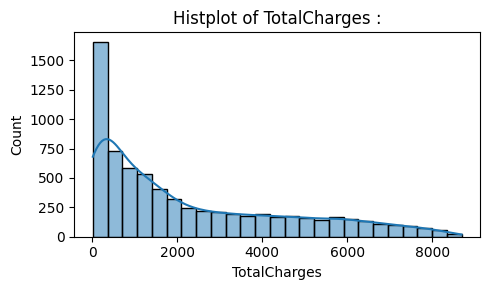

In [26]:
import seaborn as sns


numerical_columns=['tenure','MonthlyCharges','TotalCharges']


# checking the distribution of numerical column values

def plot_histogram(column):

    plt.figure(figsize=(5,3))
    sns.histplot(df[column],kde=True)
    plt.title(f"Histplot of {column} :")
    plt.tight_layout()
    plt.show()

for column in numerical_columns:

   plot_histogram(column)



Scaling the data:

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


SS=StandardScaler()
df[numerical_columns]=SS.fit_transform(df[numerical_columns])

MMS=MinMaxScaler()
df[numerical_columns]=MMS.fit_transform(df[numerical_columns])

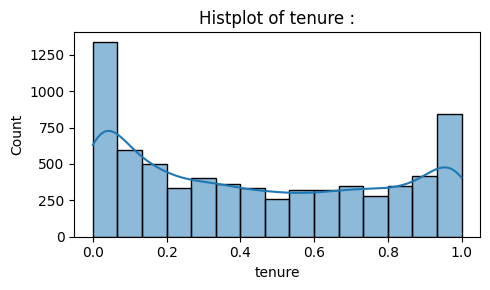

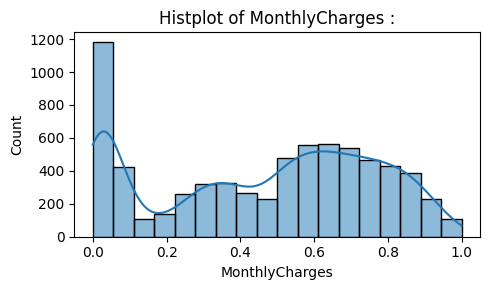

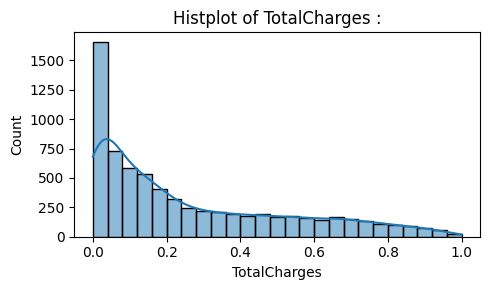

In [28]:

for column in numerical_columns:

   plot_histogram(column)

Now we analyze in all the categorical columns that which particular category is  less or more  likely to churn

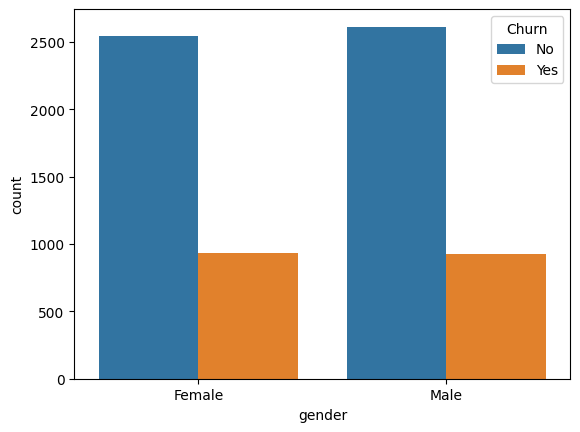

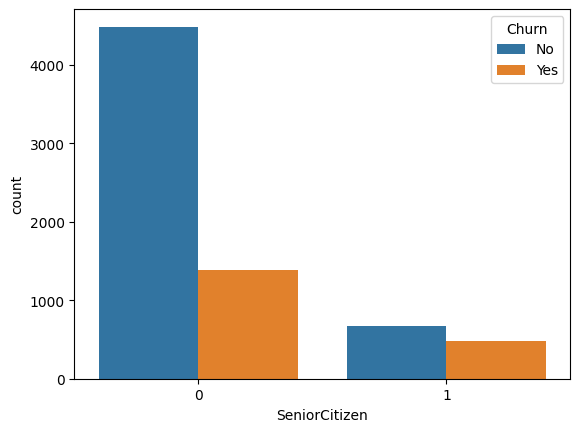

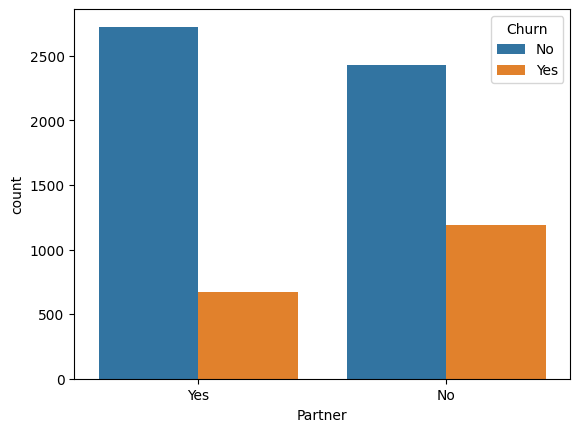

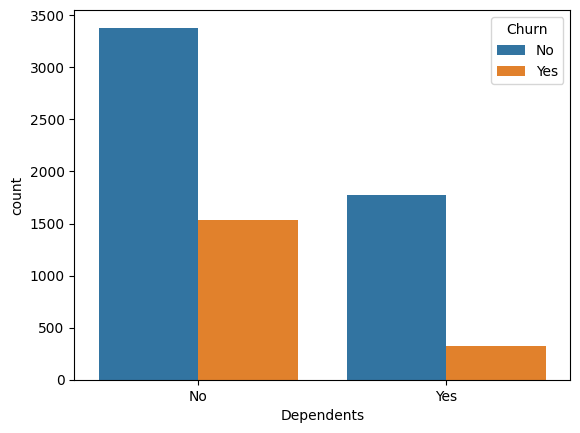

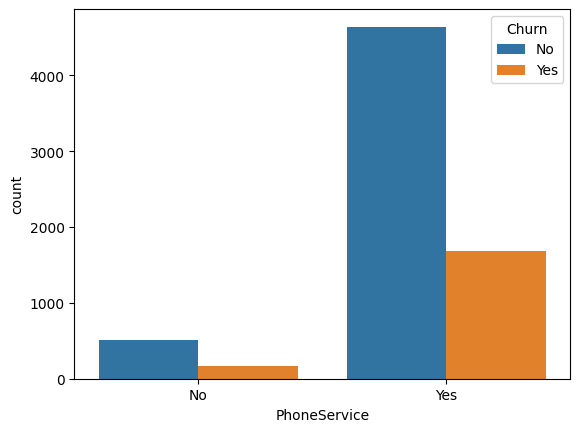

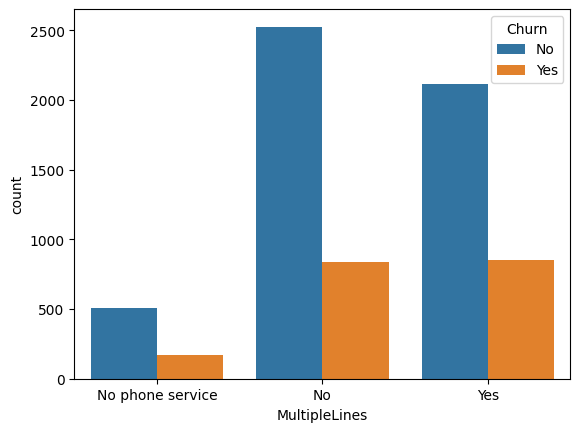

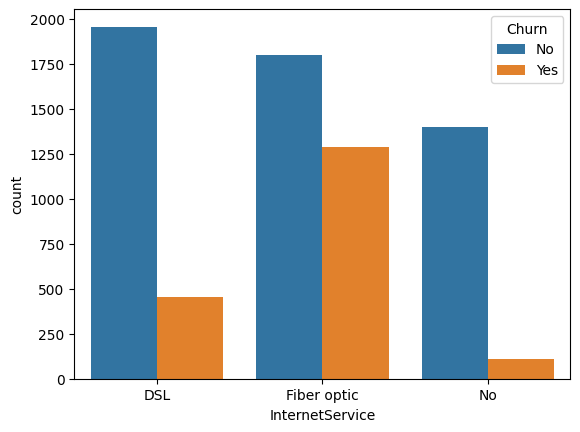

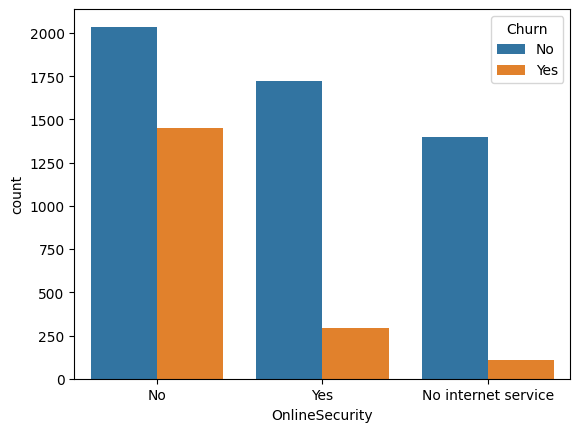

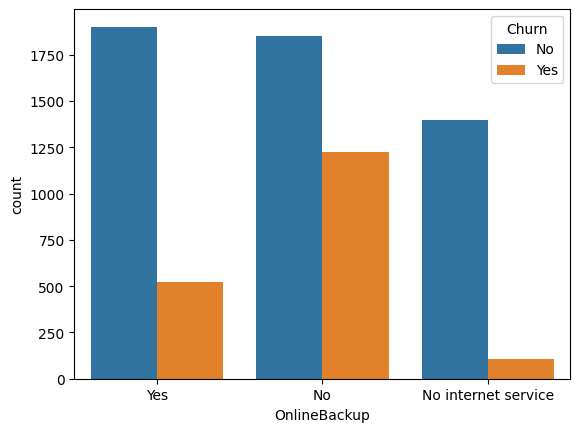

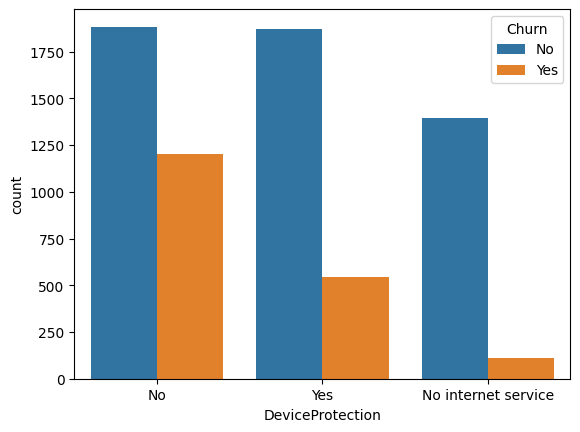

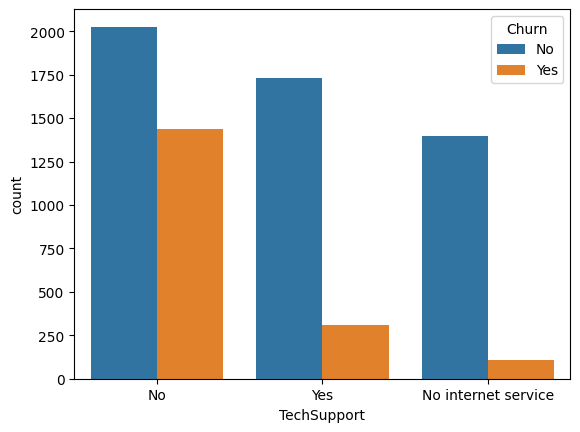

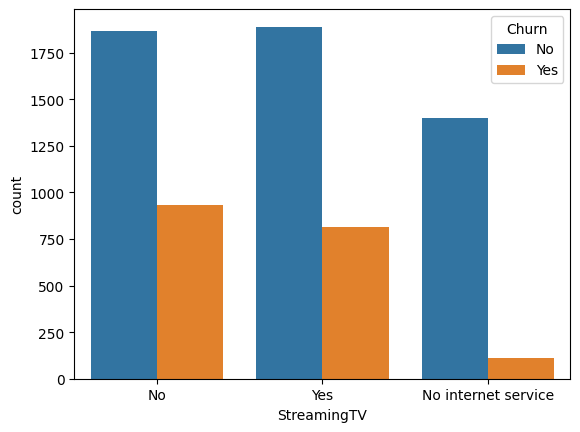

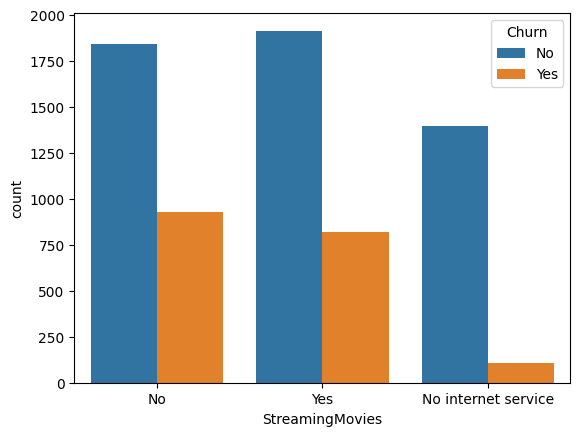

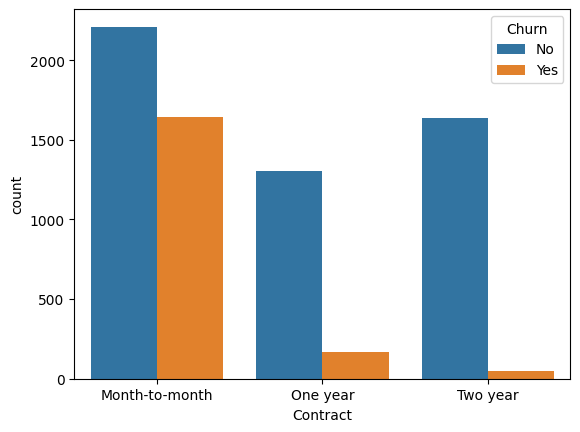

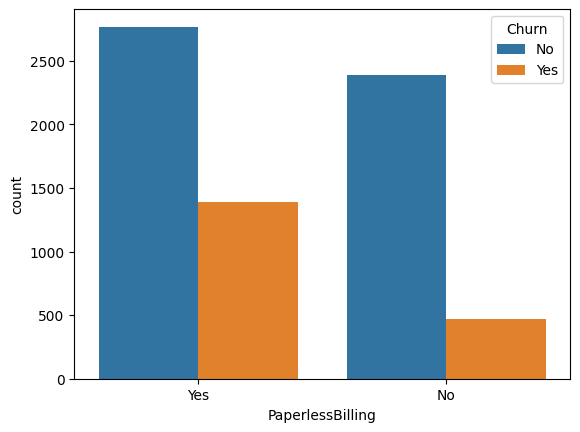

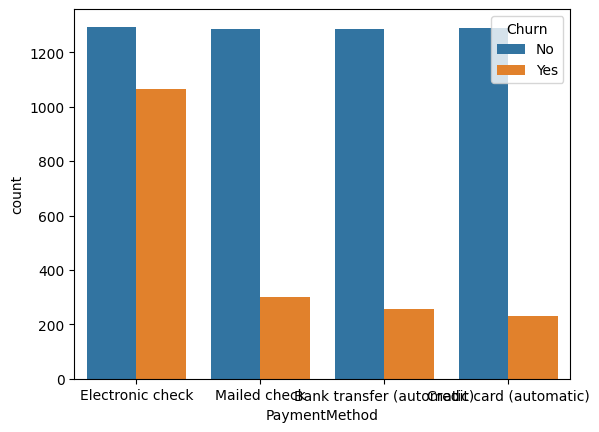

In [29]:
for i , column in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data=df,x=column,hue='Churn')

# **Insights drawn from above plots**

1.   Gender does not have any role in churn prediction as the
rates of both are same
2.   The ones who are not senior citizen are more likely to churn
3.   Persons having no partner and no dependents are more likely to churn
4.   People who have phone service either multiple lines or not are more likely to churn and the ones having no phone service
are less likely to churn

5.   The ones who are using Fiber Optic Internet Service are more likely to churn

6.   Having no online security, no device protection, no tech support, no online backup, no streaming tv,
   no streaming movies causes more to churn
7.   Persons who are on month to month billing contract are more likely to churn

8.   Persons who are using paperless billing and electronic check payment method are more likely to churn



In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,Male,0,No,No,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,Male,0,No,No,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,Male,0,No,No,0.619718,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,Female,0,No,No,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


Applying Label Encoding on the target column

In [31]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

Applying One Hot Encoding on the categorical feature columns and then concatenating it again with other numerical columns

In [32]:
df_dummy=pd.get_dummies(df.drop(columns=['tenure','MonthlyCharges','TotalCharges','Churn'])).astype(int)
df=pd.concat([df_dummy,df[['tenure','MonthlyCharges','TotalCharges','Churn']]],axis=1)

In [33]:
df.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0.000000,0.115423,0.001275,0
1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0.464789,0.385075,0.215867,0
2,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0.014085,0.354229,0.010310,1
3,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0.619718,0.239303,0.210241,0
4,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0.014085,0.521891,0.015330,1


Plotting the numerical columns to see their distributions according to churn rate

Text(0.5, 1.0, 'Churn by monthly charges')

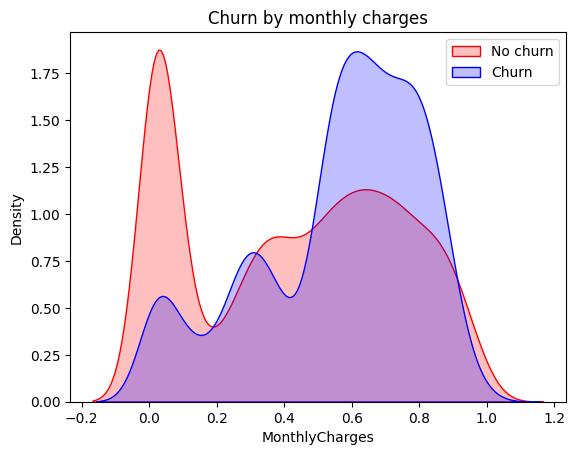

In [34]:
sns.kdeplot(df.MonthlyCharges[(df['Churn']==0)],color='red',shade=True)
sns.kdeplot(df.MonthlyCharges[(df['Churn']==1)],color='blue',shade=True)
plt.legend(['No churn','Churn'])
plt.title('Churn by monthly charges')

**Insight: Churn is high when monthly charges are high**

Text(0.5, 1.0, 'Churn by Total charges')

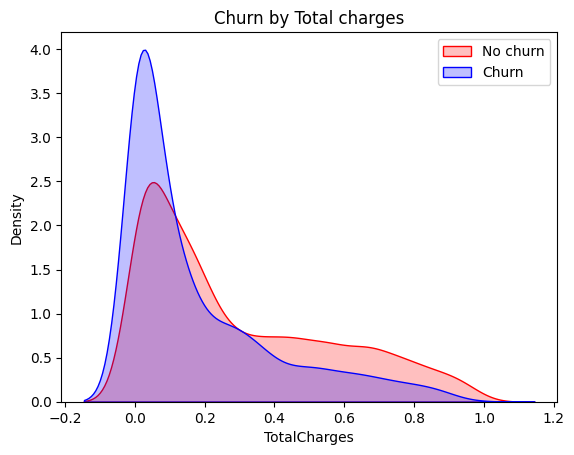

In [35]:
sns.kdeplot(df.TotalCharges[(df['Churn']==0)],color='red',shade=True)
sns.kdeplot(df.TotalCharges[(df['Churn']==1)],color='blue',shade=True)
plt.legend(['No churn','Churn'])
plt.title('Churn by Total charges')

**Surprising insight: Lower total charges lead to more churn**

Text(0.5, 1.0, 'Churn by Tenure')

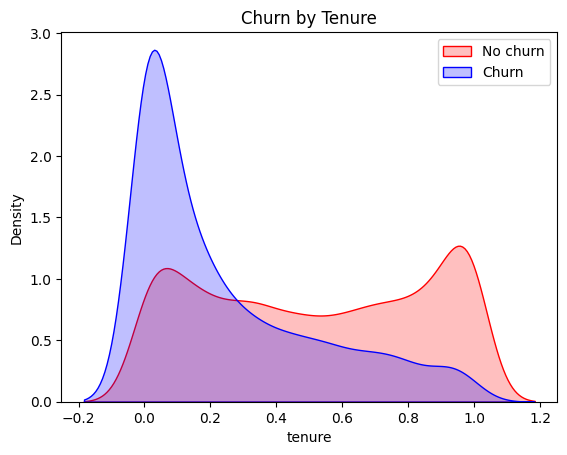

In [36]:
sns.kdeplot(df.tenure[(df['Churn']==0)],color='red',shade=True)
sns.kdeplot(df.tenure[(df['Churn']==1)],color='blue',shade=True)
plt.legend(['No churn','Churn'])
plt.title('Churn by Tenure')

 **Insight: People who are having less tenure are more likely to churn**

# **Plotting the correlation of Churn Colum with all other features**

In [37]:
df.corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
Contract_Month-to-month,0.404346
OnlineSecurity_No,0.341853
TechSupport_No,0.336456
InternetService_Fiber optic,0.307612
PaymentMethod_Electronic check,0.301079
OnlineBackup_No,0.266637
DeviceProtection_No,0.251038
MonthlyCharges,0.194008
PaperlessBilling_Yes,0.190518


<Axes: >

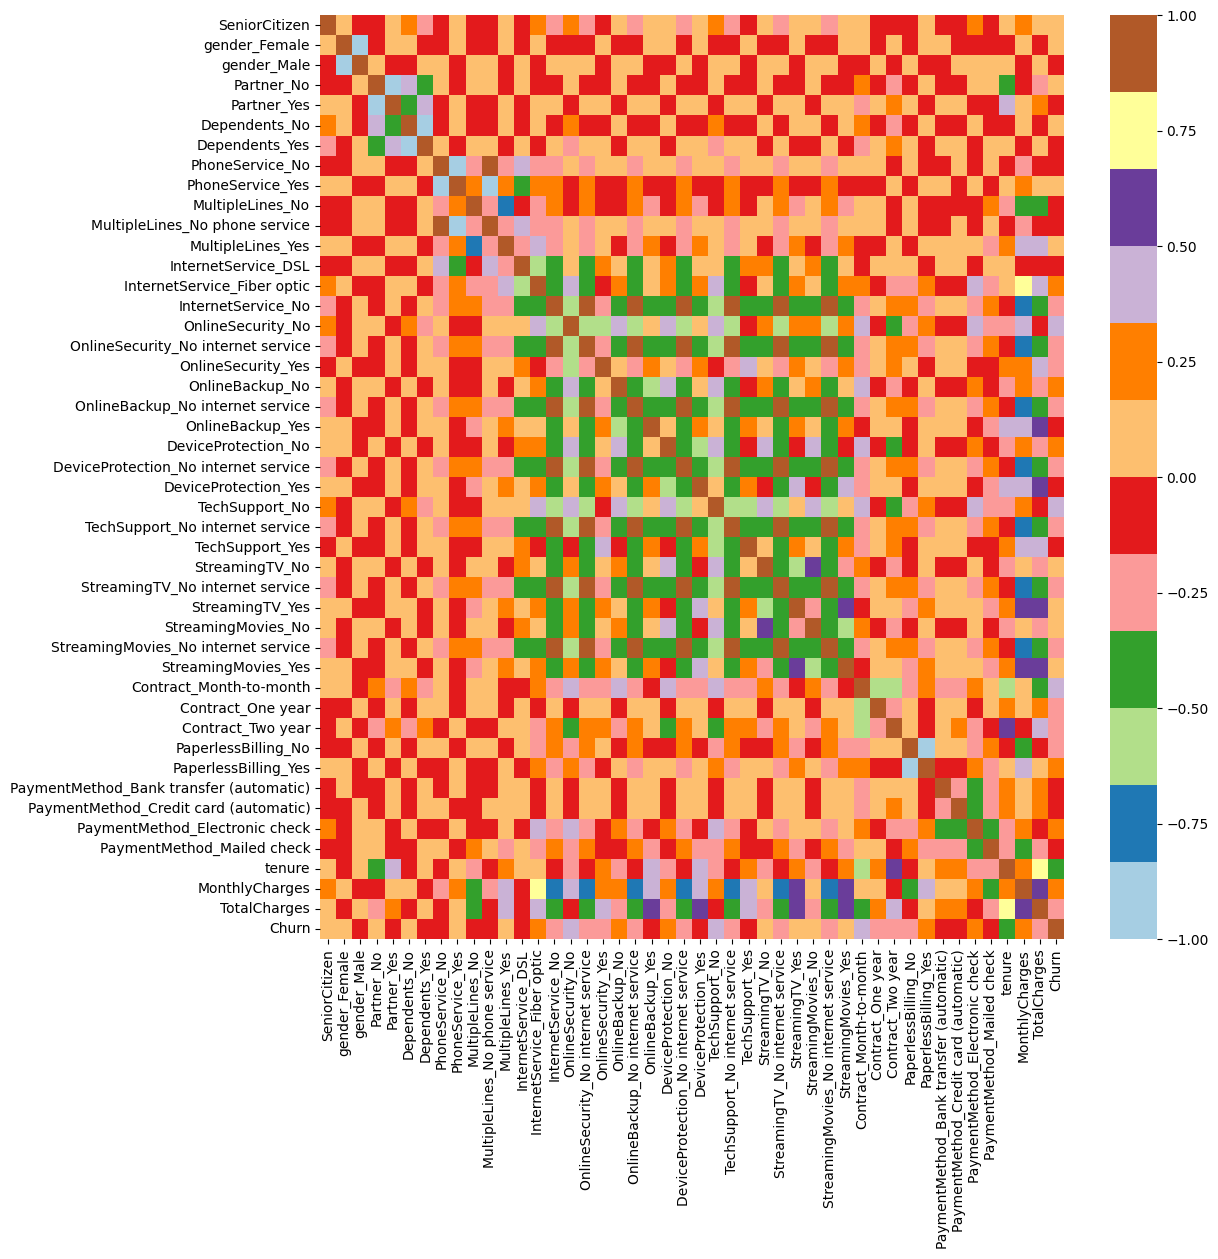

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='Paired')

Train - Test - Split

In [39]:
X=df.drop(columns=['Churn'])
y=df['Churn']

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [40]:
# Ensure x_train and y_train are in appropriate format
if not isinstance(x_train, (np.ndarray, pd.DataFrame)):
    x_train = np.array(x_train)

if not isinstance(y_train, (np.ndarray, pd.Series)):
    y_train = np.array(y_train)

In [41]:
algorithm=[]
accuracy_list=[]
precision_list=[]
recall_list=[]
f1_list=[]
roc_auc_list=[]
best_hyperparameter=[]
execution_time=[]
remarks=[]

# **Random Forest**

In [42]:
parameters={
    'n_estimators':[10,50,100,250],
    'max_depth':[5,10,15,20],
    'min_samples_split':[2,8,16,20],
    'min_samples_leaf':[2,4,6,8],
    'bootstrap':[True,False],
    'criterion':['entropy','gini']
}

Random_forest=RandomForestClassifier()

# Randomized Search CV for Random Forest
rand_search_Random_forest=RandomizedSearchCV(estimator=Random_forest,param_distributions=parameters,
                                 n_iter=10,cv=5,scoring='f1',n_jobs=1,random_state=42)

rand_search_Random_forest.fit(x_train,y_train)
ypred_random_forest=rand_search_Random_forest.predict(x_test)

# Best parameters and score
print("Best Parameters for Random_forest with random search:", rand_search_Random_forest.best_params_)
print("Best Score for Random_forest with random search:", rand_search_Random_forest.best_score_)



Best Parameters for Random_forest with random search: {'n_estimators': 50, 'min_samples_split': 16, 'min_samples_leaf': 8, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}
Best Score for Random_forest with random search: 0.5825636246731489


In [43]:

parameters={'n_estimators': [50], 'min_samples_split': [16],
     'min_samples_leaf': [8], 'max_depth': [10],
     'criterion': ['entropy'], 'bootstrap': [True]}

# Set up GridSearchCV for random forest
grid_search_random_forest = GridSearchCV(estimator=Random_forest, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search_random_forest.fit(x_train, y_train)
ypred_grid_search_random_forest=grid_search_random_forest.predict(x_test)

# Best parameters and score
print("Best Parameters for Random_forest with grid search:", grid_search_random_forest.best_params_)
print("Best Score for Random_forest with grid search:", grid_search_random_forest.best_score_)

Best Parameters for Random_forest with grid search: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 50}
Best Score for Random_forest with grid search: 0.8426970401661109


confusion_matrix:  


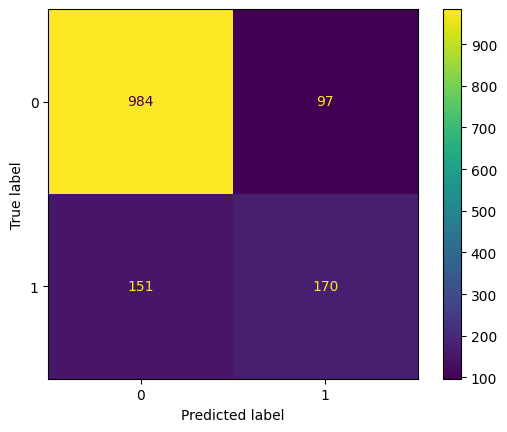

In [44]:
from sklearn.metrics import roc_auc_score


algorithm.append('Random Forest')
accuracy_list.append(accuracy_score(y_test,ypred_grid_search_random_forest))
precision_list.append(precision_score(y_test,ypred_grid_search_random_forest))
recall_list.append(recall_score(y_test,ypred_grid_search_random_forest))
f1_list.append(f1_score(y_test,ypred_grid_search_random_forest))
best_hyperparameter.append(grid_search_random_forest.best_params_)
roc_auc_list.append(roc_auc_score(y_test,ypred_grid_search_random_forest))
execution_time.append('1s' )

print('confusion_matrix:  ')
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_grid_search_random_forest)).plot()
plt.show()


# **SVC**

In [45]:
parameters={
    'C':[0.1,1,10,100],
    'kernel':['rbf','poly','sigmoid'],
    'gamma':['scale','auto'],
    'class_weight':['balanced']
}
svc= SVC()


randomized_svc=RandomizedSearchCV(estimator=svc,param_distributions=parameters,
                                  n_iter=10,cv=5,scoring='f1',n_jobs=-1,random_state=42)

randomized_svc.fit(x_train,y_train)
ypred_randomized_svc=randomized_svc.predict(x_test)

print("Best Parameters for SVC with randomized search:",randomized_svc.best_params_)
print("Best Score for SVC with randomized search:",randomized_svc.best_score_)


Best Parameters for SVC with randomized search: {'kernel': 'poly', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 10}
Best Score for SVC with randomized search: 0.6219015085063684


In [46]:
parameters={
    'C':[10,100],
    'kernel':['poly'],
    'gamma':['auto'],
    'class_weight':['balanced']
}
grid_svc=GridSearchCV(estimator=svc,param_grid=parameters,cv=5,
                      n_jobs=-1,scoring='roc_auc')

grid_svc.fit(x_train,y_train)
ypred_grid_svc=grid_svc.predict(x_test)

print("Best Parameters for SVC with grid search:",grid_svc.best_params_)
print("Best Score for SVC with grid search:",grid_svc.best_score_)

Best Parameters for SVC with grid search: {'C': 10, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'poly'}
Best Score for SVC with grid search: 0.8262500230904504


confusion_matrix:  


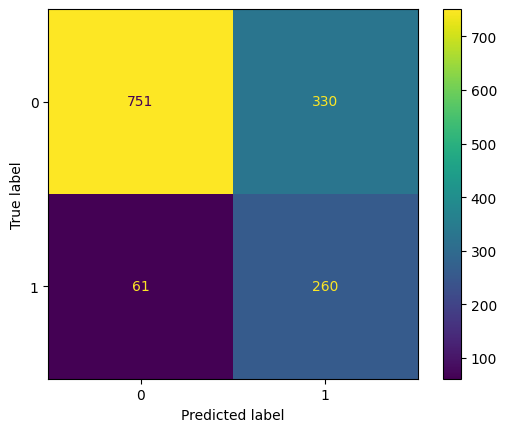

In [47]:

algorithm.append('SVC')
accuracy_list.append(accuracy_score(y_test,ypred_grid_svc))
precision_list.append(precision_score(y_test,ypred_grid_svc))
recall_list.append(recall_score(y_test,ypred_grid_svc))
f1_list.append(f1_score(y_test,ypred_grid_svc))
best_hyperparameter.append(grid_svc.best_params_)
roc_auc_list.append(roc_auc_score(y_test,ypred_grid_svc))
execution_time.append('14s' )

print('confusion_matrix:  ')
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_grid_svc)).plot()
plt.show()

# **XGB Classifier**

In [48]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()

x_smote,y_smote=sm.fit_resample(X,y)
x_train_smote,x_test_smote,y_train_smote,y_test_smote=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

pca=PCA(0.9)
x_train_pca=pca.fit_transform(x_train_smote)
x_test_pca=pca.transform(x_test_smote)
explained_variance=pca.explained_variance_ratio_
parameters = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgboost_model=XGBClassifier()

rand_search_xgb=RandomizedSearchCV(estimator=xgboost_model,param_distributions=parameters,
                                  n_iter=10,cv=5,scoring='f1',n_jobs=1,random_state=42)
rand_search_xgb.fit(x_train_pca,y_train_smote)
ypred_rand_search_xgb=rand_search_xgb.predict(x_test_pca)

print(rand_search_xgb.best_params_)
print(rand_search_xgb.best_score_)


{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1}
0.9576019794442978


In [49]:
x_test.shape

(1402, 45)

In [50]:
parameters = {
    'n_estimators': [ 300],
    'learning_rate': [ 0.05],
    'max_depth': [7,10],
    'min_child_weight': [ 5,10],
    'subsample': [1.0],
    'gamma': [ 0.2]
}
grid_search_xgb=GridSearchCV(estimator=xgboost_model,param_grid=parameters,
                             cv=5,scoring='f1',n_jobs=1)
grid_search_xgb.fit(x_train_pca,y_train_smote)
ypred_grid_xgb=grid_search_xgb.predict(x_test_pca)
print(grid_search_xgb.best_params_)
print(grid_search_xgb.best_score_)

{'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 1.0}
0.9545565274012204


confusion_matrix:  


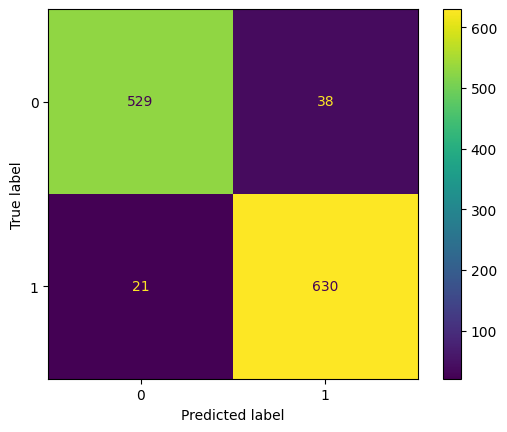

In [51]:
algorithm.append('XGBoost')
accuracy_list.append(accuracy_score(y_test_smote,ypred_grid_xgb))
precision_list.append(precision_score(y_test_smote,ypred_grid_xgb))
recall_list.append(recall_score(y_test_smote,ypred_grid_xgb))
f1_list.append(f1_score(y_test_smote,ypred_grid_xgb))
best_hyperparameter.append(grid_search_xgb.best_params_)
roc_auc_list.append(roc_auc_score(y_test_smote,ypred_grid_xgb))
execution_time.append('23s' )

print('confusion_matrix:  ')
ConfusionMatrixDisplay(confusion_matrix(y_test_smote,ypred_grid_xgb)).plot()
plt.show()

In [52]:
print(algorithm)
print(accuracy_list)
print(precision_list)
print(recall_list)
print(f1_list)
print(best_hyperparameter)
print(roc_auc_list)
print(execution_time)

['Random Forest', 'SVC', 'XGBoost']
[0.8231098430813124, 0.7211126961483595, 0.951559934318555]
[0.6367041198501873, 0.4406779661016949, 0.9431137724550899]
[0.5295950155763239, 0.8099688473520249, 0.967741935483871]
[0.5782312925170068, 0.570801317233809, 0.9552691432903715]
[{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 16, 'n_estimators': 50}, {'C': 10, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'poly'}, {'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 1.0}]
[0.7199316428482914, 0.7523479759424325, 0.9503612675655686]
['1s', '14s', '23s']


In [58]:
Remarks=[
    " Didn't capture the model pattern well", # random forest
    " Just performed normal", # svc
    "Performed best with pca and smoteenn" # for xgboost
]

Performance dataFrame

In [59]:
performance_df=pd.DataFrame({"Algorithm":algorithm,
                             "Accuracy Score":accuracy_list,
                             "Precision Score":precision_list,
                             "recall Score":recall_list,
                             "F1 Score":f1_list,
                             "roc_auc Score":roc_auc_list,
                             "Best Hyperparameter":best_hyperparameter,
                             "Execution Time":execution_time,
                             "Remarks":Remarks}).sort_values('Accuracy Score',ascending=False)

In [61]:
performance_df

,Algorithm,Accuracy Score,Precision Score,recall Score,F1 Score,roc_auc Score,Best Hyperparameter,Execution Time,Remarks
2,XGBoost,0.951560,0.943114,0.967742,0.955269,0.950361,"{'gamma': 0.2, 'learning_rate': 0.05, 'max_dep...",23s,Performed best with pca and smoteenn
0,Random Forest,0.823110,0.636704,0.529595,0.578231,0.719932,"{'bootstrap': True, 'criterion': 'entropy', 'm...",1s,Didn't capture the model pattern well
1,SVC,0.721113,0.440678,0.809969,0.570801,0.752348,"{'C': 10, 'class_weight': 'balanced', 'gamma':...",14s,Just performed normal


# **Bar Chart of Performance Metrics**

In [65]:
# Plot the bar chart
metrics = ['Accuracy Score', 'Precision Score', 'recall Score', 'F1 Score', 'roc_auc Score']
df_melted = performance_df.melt(id_vars='Algorithm', value_vars=metrics, var_name='Metric', value_name='Score')
df_melted


,Algorithm,Metric,Score
0,XGBoost,Accuracy Score,0.951560
1,Random Forest,Accuracy Score,0.823110
2,SVC,Accuracy Score,0.721113
3,XGBoost,Precision Score,0.943114
4,Random Forest,Precision Score,0.636704
5,SVC,Precision Score,0.440678
6,XGBoost,recall Score,0.967742
7,Random Forest,recall Score,0.529595
8,SVC,recall Score,0.809969
9,XGBoost,F1 Score,0.955269


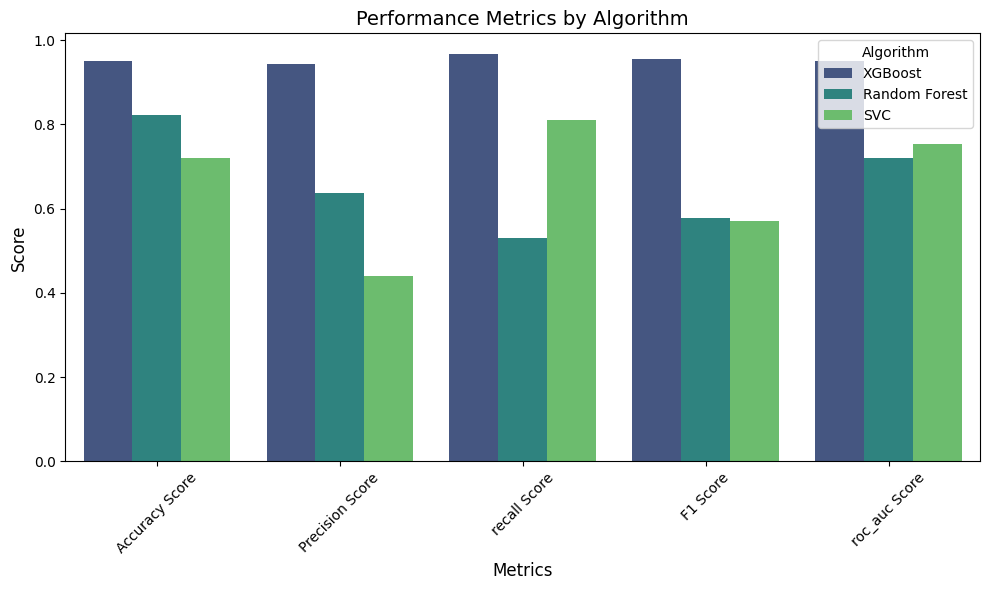

In [66]:


plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Algorithm', palette='viridis')
plt.title('Performance Metrics by Algorithm', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metrics', fontsize=12)
plt.legend(title='Algorithm', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()